<div style="float:center;width:100%;text-align: center;"><strong style="height:100px;color:darkred;font-size:40px;">Vector and Matrix Norms</strong></div>

# 1. Introduction

<div style="background-color:#F2F5A9;">

Let $V$ be a vector space over the scalars $\mathbb{F}$.

A **norm** is a function from $\lVert v \rVert : v \in V \longrightarrow \mathbb{R}$ with the following properties for all scalars $\alpha \in \mathbb{F}$ and all $u,v,w \in V:$
* **Homogeneity:** $\quad\quad$ $\lVert \alpha v \rVert = \lvert \alpha \rvert \ \lVert v \rVert$
* **Triangle inequality:** $\,$ $\lVert v+w \rVert \le \lVert v \rVert + \lVert w \rVert$
* **Positivity:** $\;\;\quad\quad\quad$ $\lVert v \rVert = \left\{ \begin{align} c > 0 & \quad \text{ for all } v \ne 0 \\ 0 & \quad \text{ otherwise} \end{align} \right.$
</div>

# 2. Vector Norms

<div style="float:left;width:45%;border:1px solid black;padding:10pt;height:4.0cm;background-color:#F2F5A9;">

**Definition:** Let $v = \left( v_1, v_2, \dots v_n \right)$ be a vector in $\mathbb{F}^n$.

The $l^p $ norms of $v$ are defined by
$$
\lVert v \rVert_p = \left( \sum_{i=1}^n \lvert v_i \rvert^p    \right)^\frac{1}{p},   \quad \text{ for any } p \ge 1
$$
</div>
<div style="float:right;width:45%;border:1px solid black;padding:10pt;height:4.0cm;background-color:#F2F5A9;">

Three important specal cases are

|   |    |     |
| ------ | ------ | ------- |
| $l^2$ | (Euclidean norm): $\quad$ | $\lVert v \rVert_2 = \sqrt{ \lvert v_1 \rvert^2 + \lvert v_2 \rvert^2 \dots + \lvert v_n \rvert^2  }$ |
| $l^1$ | (1-norm):         | $\lVert v \rVert_1 =  \lvert v_1 \rvert + \lvert v_2 \rvert \dots + \lvert v_n \rvert$ |
| $l^\infty$ | (max norm)   | $\lVert v \rVert_\infty = \max \left( \lvert v_1 \rvert ,  \lvert v_2 \rvert \dots ,  \lvert v_n \rvert  \right)$  |

</div>

**Remarks:**
* for $p < 1$, the triangle inequality is not satisfied
* The $l^0$ "norm", i.e., the function that returns the number of non-zero entries in $v$ is not a norm.

#### **Vector Length Versus $p$**

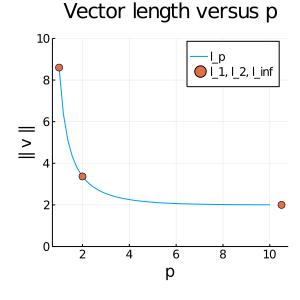

In [84]:
x = range(1,stop=10,length=50); v=[2.; 1.2; 1.1; -0.1; 0.6; 0; 1.2; 1.2; 1.2]
y = [reduce(+, map(x->abs(x)^p, v))^(1.0/p) for p in x]
plot(x, y, label="l_p")
scatter!([x[1], 2, 10.5], [y[1],reduce(+, map(x->abs(x)^2, v))^0.5, max(abs.(v)...)], label="l_1, l_2, l_inf")
plot!(title="Vector length versus p", size=(300,300),xlabel="p",ylabel="|| v ||",yrange=(0,10))

#### **Unit Balls**

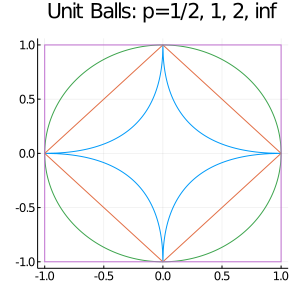

In [55]:
using LinearAlgebra, LaTeXStrings, Plots
N=2000; θ = [(i/N)*2π for i in 0:N ]; cosθ = cos.(θ); sinθ = sin.(θ)

r1   = 1.0 ./ (abs.(cosθ) .+ abs.(sinθ))
rinf = 1.0 ./ max.(abs.(cosθ), abs.(sinθ) )

k    = 2
p    = 1. / k;  rp   = ( abs.(cosθ).^p .+ abs.(sinθ).^p ) .^ (-k)

plot( cosθ .* rp,   sinθ .* rp,   label="p = 1/$k")
plot!(cosθ .* r1,   sinθ .* r1,   label="p = 1")
plot!(cosθ,         sinθ,         label="p = 2")
plot!(cosθ .* rinf, sinθ .* rinf, label="p = inf")
plot!(title = "Unit Balls: p=1/$k, 1, 2, inf", legend=:none, aspect = :equal, size=(300,300) )

#### **Minimization Using $l_{_{_1}}$ Yields Sparse Solutions**

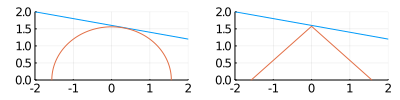

In [105]:
x=[-2;2]; y=[(8-2*x[1])/4; (8-2*x[2])/4 ]   # 2x - 4y = 8

p_circle  = plot([x[1];y[1]], [x[2];y[2]]); plot!(1.56*cosθ,1.56*sinθ); plot!(xrange=(-2,2), yrange=(-2,2), size=(300,300), legend=:none)
p_diamond = plot([x[1];y[1]], [x[2];y[2]]); plot!(cosθ .* 1.575r1,   sinθ .* 1.575r1); plot!(xrange=(-2,2), yrange=(-2,2), size=(300,300), legend=:none)

plot(p_circle, p_diamond, size=(400,100),yrange=(0,2))

for matrices, may want to minimize the rank: use the $l_1$ norm of $\Sigma$!

# 3. Matrix Norms

$\blacktriangleright\blacktriangleright$ **We will construct matrix norms using vector norms**

<div style="background-color:#F2F5A9;">

**Definition:** A matrix norm is **submultiplicative** iff for any two matrices $A, B$ of consistent size,
$$
\lVert A B \rVert \le \lVert A \rVert \ \lVert B \rVert
$$

**Definition:** A matrix norm is **unitarily invariant** iff<br>
$\quad\quad$ for any matrix $A$ and any two orthogonal (or unitary) matrices $U, V$ of consistent size,
$$
\lVert U A V \rVert = \lVert A \rVert
$$
</div>

## 3.1 Entrywise Vector Norm: $\lVert vec(A) \rVert_{_{_p}}$

<div style="background-color:#F2F5A9;">

**Definition:** Let $vec(A)$ be a vector of the entries of a matrix $A$ of size $M \times N$.

$$
\lVert A \rVert_p = \lVert vec(A) \rVert = \left( \sum_{i=1}^M \sum_{j=1}^N \lvert a_{i j} \rvert^p \right)^\frac{1}{p}
$$
    
**Theorem:**
* Entrywise norms are **not unitarily invariant**  for $p \ne 2$
* Entrywise norms are **submultiplicative** iff $1 \le p \le 2$
</div>

Note the following special cases

|  vector norm $\quad$        | Entrywise norm                          |
| ---                         | ---                                                         |
| $l^1$                       | $$\lVert A \rVert_1 = \sum_{i,j} { \lvert a_{i j} \rvert } \quad$$     |
| $l^\infty$  (maximum norm)  | $$\lVert A \rVert_\infty = \max_{i, j}{ \lvert a_{i j} \rvert }\;$$       |
| $l^2$  (Frobenius norm)     | $$\;\; \lVert A \rVert_F = \sqrt{ \sum_{i} {\lvert a_{i j} \rvert^2} }$$  |

**Remarks:**
* The special case $p=2$ is known as the **Frobenius norm,** typically denoted $\lVert A \rVert_F$<br>
$\quad\quad\quad$ Note that $\lVert A \rVert_F = \sqrt{ trace \left( { A^t A } \right) } = \sum_i { \sigma_i^2 }$, where $\sigma_i$ are the singular values of $A$<br>
* The Frobenius norm is **unitarily invariant** and **submultiplicative**

## 3.2 Schatten Norm: Vector Norm of the Singular Value $\Sigma$ matrix

<div style="background-color:#F2F5A9;">

**Definition:** Let $A$ have singular values $\sigma_1, \sigma_2, \dots, \sigma_r$, and let $\lVert \cdot \rVert$ be a vector norm.<br>
$\quad\quad$ The Schatten norm of $A$ is
    $\lVert A \rVert = \lVert \left( \sigma_1, \sigma_2, \dots, \sigma_r \right) \rVert$
    
**Theorem:** The Schatten norms are **unitarily invariant** and **submultiplicative**.
</div>

Note the following special cases

|  vector norm $\quad$        | Schatten norm                          | comment |
| ---                         | ---                                                         | ---     |
| $l^1$ (nuclear norm, trace norm)        | $\lVert A \rVert_1 = \sum_{i} { \sigma_i }$               |         |
| $l^\infty$ (spectral norm)                 | $\lVert A \rVert_\infty = \sigma_1$       |         |
| $l^2$  (Frobenius norm)     | $$\lVert A \rVert_2 = \sqrt{ \sum_{i} { \sigma_i^2 } }$$  |         |

## 3.3 Induced Vector Norms

<div style="background-color:#F2F5A9;">

**Definition:** Let $\lVert \cdot \rVert$ be a vector norm, and let $A$ be a matrix in $\mathbb{F}^{M \times N}$.

$\quad\quad$The **induced norm** (or **operator norm**) 
$$
\lVert A \rVert = \; \sup_{ x \ne 0 }\ \frac{ \lVert A x \rVert }{ \lVert x \rVert }
$$

**Theorem:** Induced norms are **submultiplicative**
    
**Theorem:** Let $A$ be a matrix in $\mathbb{F}^{M \times N}$, let $v$ be any vector in $\mathbb{F}^N$, and let $\lVert \cdot \rVert$ be any induced norm of $A$. Then
$$
\lVert A v \rVert \le \lVert A \rVert \; \lVert v \rVert
$$
</div>

### 3.3.1 Norms induced by $l^{^p}$

Note the following special cases

|  vector norm $\quad$ | induced norm | comment |
| ---   | ---                                                              | --- |
| $l^1$ | $$\lVert A \rVert_1 = max_j \sum_{i} { \lvert a_{i j} \rvert }$$ | $\quad$ absolute column sum |
| $l^\infty$ | $$\lVert A \rVert_\infty = max_i \sum_{j} { \lvert a_{i j} \rvert }$$ | $\quad$ absolute row sum |
| $l^2$      | $$\lVert A \rVert_2 = \sigma_1 \quad\quad\quad\quad$$ |  $\quad$ largest singular value of $A$ |

<div style="background-color:#F2F5A9;">

**Theorem:** The induced p-norms with the exception $p = 2$ are **not unitarily invariant**
</div>

**Remark:**
* the entrywise $l^2$ norm and the Schatten $l^2$ norm are identical (**Frobinius**)
* the inducuced $l^2$ norm and the $l^\infty$ Schatten norm are identical (**spectral norm**)

## 3.4 Submultiplicative Norms and the Spectral Radius

<div style="background-color:#F2F5A9;">

**Theorem:** Let $A$ be a square matrix with spectral radius $\rho(A)$, and let $\lVert \cdot \rVert$ be any submultiplicative norm. Then
$$\begin{align}
        \rho(A) & \le \lVert A \rVert \\
        \rho(A) & = \lim_{k \rightarrow \infty}{ \lVert A^k \rVert^{\frac{1}{k}}} \\
\end{align}$$
</div>

**Remark:** $\rho(A)$ is **not a matrix norm**

## 3.4. Example

> Consider $A = \begin{pmatrix} 1 & -4 & 0 \\ 3 & 2 & -2 \end{pmatrix} \quad$ which has singular values $\sigma_1=\sqrt{22},\ \sigma_2 = \sqrt{12}$.

> **Entrywise Norms:**
>
> $l^2:\quad$  $\ \lVert A \rVert_2 = \sqrt{1^2 + (-4)^2 + 0^2 + 3^2 + 2^2 + (-2)^2 } \approx 5.83$<br>
> $l^1:\quad$  $\ \lVert A \rVert_1 = 1 + 4 + 0 + 3 + 2 + 2 =12$<br>
> $l^\infty:\quad$   $\lVert A \rVert_\infty = \max \left( 1, 4, 0, 3, 2, 2 \right) = 4$

> **Schatten Norms:**
>
> $l^2:\quad$  $\ \lVert A \rVert_2 = \sqrt{22+ 12} \approx 5.83$<br>
> $l^1:\quad$  $\ \lVert A \rVert_1 =\sqrt{22}+\sqrt{12} \approx 8.15$<br>
> $l^\infty:\quad$   $\lVert A \rVert_\infty = \sqrt{22} \approx 4.69$

> **Induced Norms:**
>
> $l^2:\quad$  $\ \lVert A \rVert_2 = \sqrt{ 22 } \approx 4.69$<br>
> $l^1:\quad$  $\ \lVert A \rVert_1 = \max{ ( 1 + 3, 4 + 2, 0 + 2 ) } = 6$<br>
> $l^\infty:\quad$   $\lVert A \rVert_\infty = \max \left( 1 + 4 + 0, 3 + 2 + 2 \right) = 7$

# 4. Takeaway

* The matrix norms we have considered are derived from vector norms.

* Which norm to use depends on the application
    * entrywise (e.g., the Frobenius norm) norms are easy to compute<br>
    they can be used to check how close a matrix is to the zero matrix, define continuity of matrix functions, $\dots$
    * submultiplicative norms are useful for dealing with matrix polynomials and spectral analysis
    * induced norms are useful when thinking about linear tansformations: how matrices act on vectors

The most frequently used norms are the Schatten Norms.<br>
$\quad\quad$ They are **unitarily invariant** and **submultiplicative.**

|  vector norm $\quad$        | Schatten norm                          | comment |
| ---                         | ---                                                         | --- |
| $l^1$ (nuclear norm, trace norm)        | $\lVert A \rVert_1 = \sum_{i} { \sigma_i }$               | |
| $l^2$  (Frobenius norm)     | $$\lVert A \rVert_\infty = \sqrt{ \sum_{i} { \sigma_i^2 }} = \sqrt{\sum_{i j} \lvert a_{i j} \rvert^2 }$$  | $\quad$ easy to compute, derived from euclidean length |
| $l^\infty$ (spectral norm)                 | $\lVert A \rVert_2 = \sigma_1$       | |

See https://math.stackexchange.com/questions/1394113/what-are-some-usual-norms-for-matrices#1394515